In [16]:
from tsai.all import *
import sktime
import sklearn
my_setup(sktime, sklearn)

os             : Linux-4.15.0-191-generic-x86_64-with-glibc2.27
python         : 3.10.4
tsai           : 0.3.2
fastai         : 2.6.3
fastcore       : 1.4.2
sktime         : 0.13.4
sklearn        : 1.1.3
torch          : 1.11.0
device         : 8 gpus (['Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB', 'Tesla V100-SXM2-32GB'])
cpu cores      : 96
RAM            : 754.58 GB
GPU memory     : [32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0] GB


In [78]:
# we take any multi-var ts dataset and use the last value as the target
dsid = 'LiveFuelMoistureContent'
X, y, splits = get_regression_data(dsid, split_data=False)
X = X[:,:,0:X.shape[-1]-1]
y = X[:,:,-1]
X.shape, y.shape

3510it [00:04, 830.40it/s] 
1527it [00:01, 979.72it/s] 


((5003, 7, 364), (5003, 7))

X      - shape: [5003 samples x 7 features x 364 timesteps]  type: memmap  dtype:float64  isnan: 0
y      - shape: (5003, 7)  type: memmap  dtype:float64  isnan: 0
splits - n_splits: 2 shape: [3493, 1510]  overlap: False


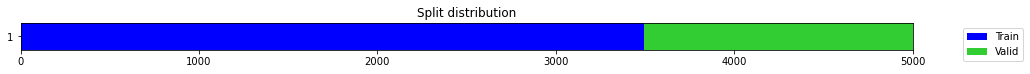

In [79]:
check_data(X, y, splits)

In [ ]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

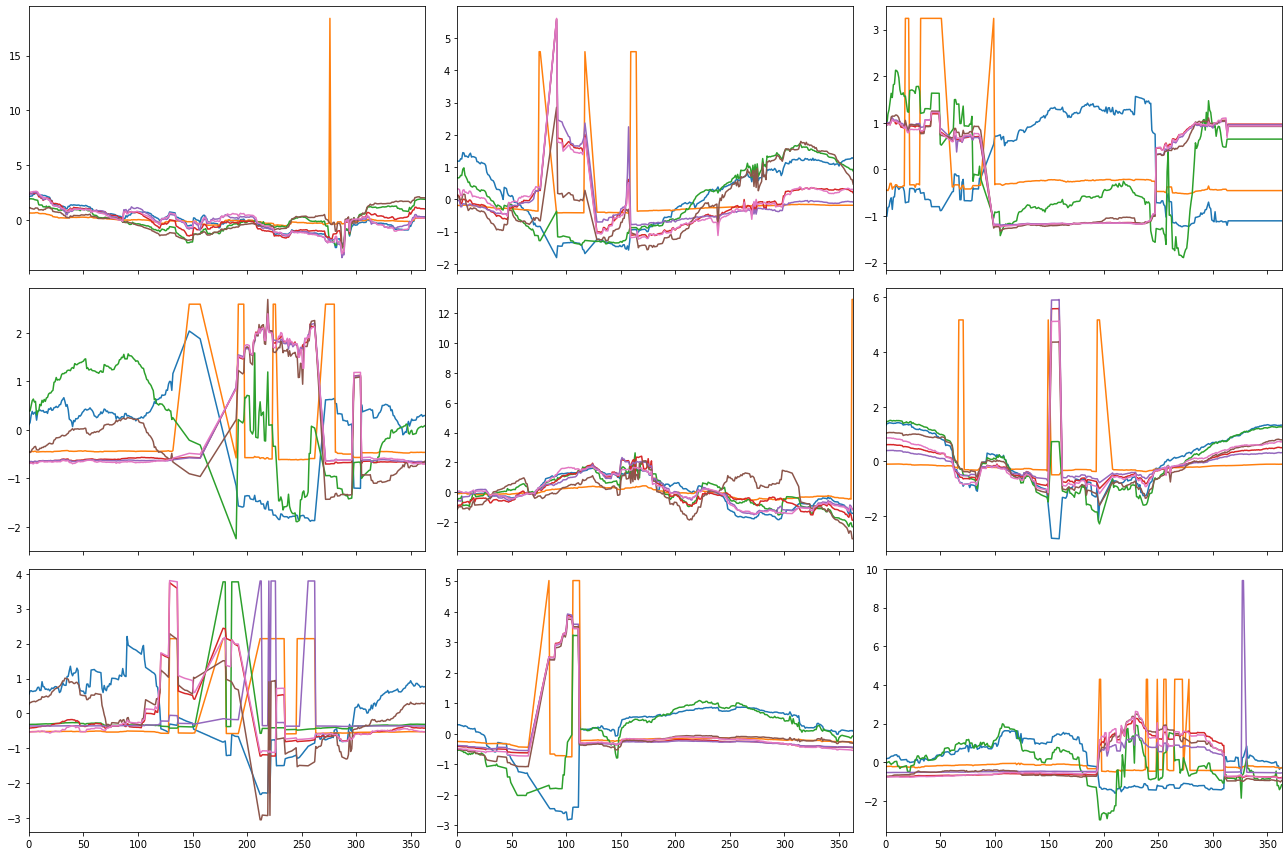

In [81]:
dls.show_batch(show_title=False)

SuggestedLRs(valley=0.015848932787775993)

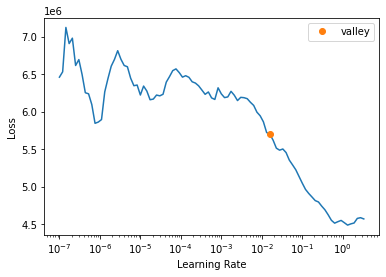

In [82]:
learn = ts_learner(dls, InceptionTimePlus17x17, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

epoch,train_loss,valid_loss,mae,_rmse,time
0,5413732.000000,5287610.000000,1198.244385,2299.480225,00:01
1,4353681.000000,3750668.250000,760.406128,1936.664307,00:01
2,3594563.250000,3434379.000000,614.463379,1853.207642,00:01
3,3130124.500000,3065329.000000,529.000916,1750.807983,00:01
4,2912090.500000,3592031.250000,875.288513,1895.265503,00:01
5,2744343.500000,3106015.750000,671.627136,1762.389160,00:01
6,2645470.000000,3289826.500000,774.574524,1813.788086,00:01
7,2488448.000000,2549328.750000,642.659546,1596.661865,00:01
8,2232548.000000,4233001.500000,1298.102539,2057.426025,00:01
9,1965747.375000,1953365.000000,663.967163,1397.628296,00:01


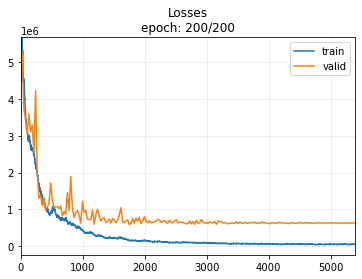

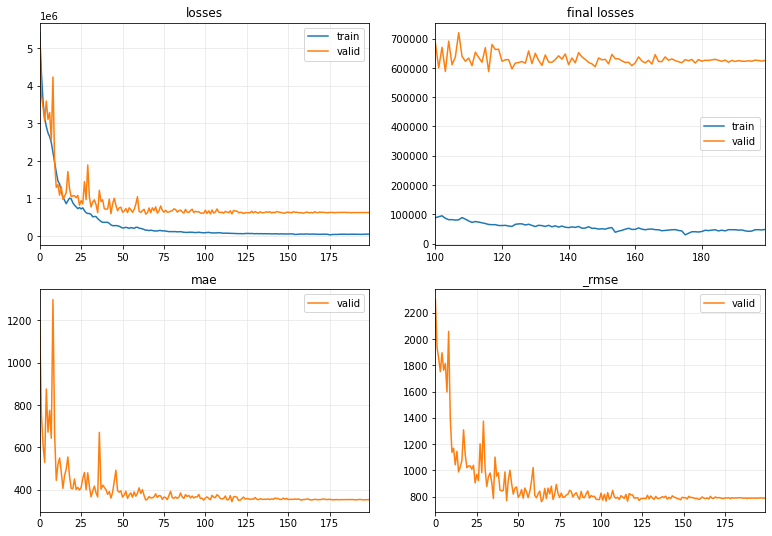

In [84]:
learn = ts_learner(dls, InceptionTimePlus32x32, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(200, .0158)

In [124]:
probas, _, preds = learn.get_X_preds(X[splits[1]])
sklearn.metrics.mean_squared_error(y[splits[1]], preds, squared=False)

703.2710644285908

In [139]:
x_test = torch.tensor(X[splits[1]][0].astype("float32")).to(device)

In [140]:
learn.model(x_test)

RuntimeError: running_mean should contain 1456 elements not 128